<a href="https://colab.research.google.com/github/SarathiKrish/Machine-Learning/blob/main/Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('Housing.csv')
print(df.head())

Saving Housing.csv to Housing.csv
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [2]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [40]:
list1 = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']

In [41]:
df[list1] = df[list1].replace({'yes':1,'no':0})

In [42]:
list2 = ['price','area']

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[list2] = scaler.fit_transform(df[list2])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.566365,1.046726,4,2,3,1,0,0,0,1,2,1,furnished
1,4.004484,1.757010,4,4,4,1,0,0,0,1,3,0,furnished
2,4.004484,2.218232,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,3.985755,1.083624,4,2,2,1,0,1,0,1,3,1,furnished
4,3.554979,1.046726,4,1,2,1,1,1,0,1,2,0,furnished


In [45]:
# Convert 'furnishingstatus' column to numerical representation using one-hot encoding
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

# Now calculate the correlation matrix
core = df.corr()

<Axes: >

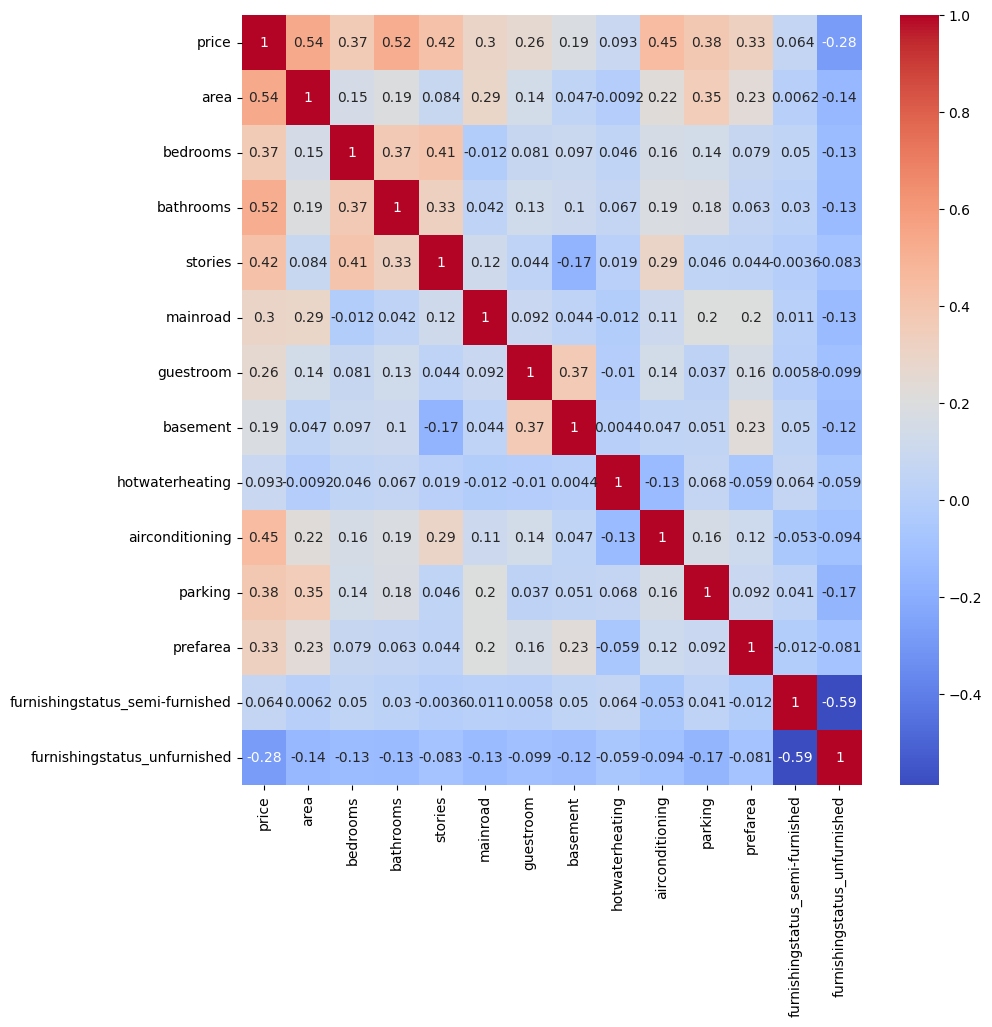

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(core,annot=True,cmap='coolwarm') # Changed 'camp' to 'cmap' and corrected the colormap name to 'coolwarm'

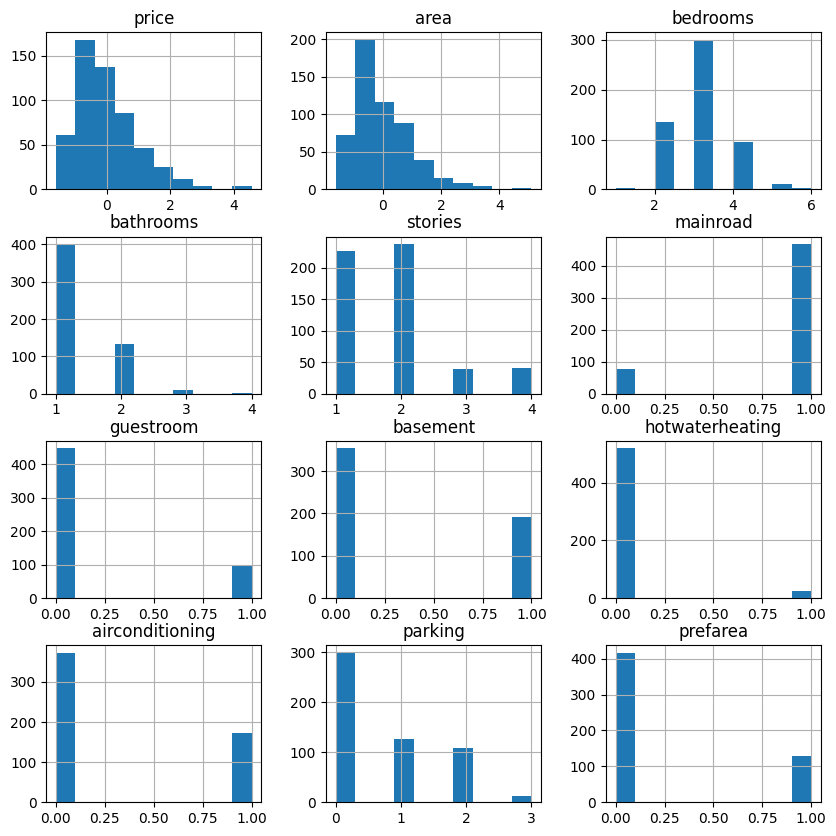

In [49]:
df.hist(figsize=(10,10),bins=10)
plt.show()

In [53]:
x=df.drop('price',axis=1)
y=df['price']

In [54]:
y

,price
0,4.566365
1,4.004484
2,4.004484
3,3.985755
4,3.554979
...,...
540,-1.576868
541,-1.605149
542,-1.614327
543,-1.614327


In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [57]:
x_trainshape

(436, 13)

In [59]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()